**TP2**

In [22]:
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import copy

# Entrena una red ya definida previamente "evaluaciones" veces, cada vez
# entrenando un número de épocas elegido al crear la red, y midiendo el error en
# train, validación y test al terminar ese paso de entrenamiento.
# Devuelve la mejor red, la lista de los errores de train, la lista de los
# errores de validación y la lista de los errores de test
def entrenar_red(red, evaluaciones, X_train, y_train, X_val, y_val, X_test,
                 y_test):
  redes = []
  error_train = []
  error_val = []
  error_test = []

  for i in range(evaluaciones):
    red.fit(X_train, y_train)
    y_train_pred = red.predict(X_train)
    y_val_pred = red.predict(X_val)
    y_test_pred = red.predict(X_test)

    # Para clasificación usamos el error de clasificación
    if type(red) == type(MLPClassifier()):
      e_train = sk.metrics.zero_one_loss(y_train, y_train_pred)
      e_val = sk.metrics.zero_one_loss(y_val, y_val_pred)
      e_test = sk.metrics.zero_one_loss(y_test, y_test_pred)
    # Para regresión usamos el error cuadrático medio
    else:
      e_train = sk.metrics.mean_squared_error(y_train, y_train_pred)
      e_val = sk.metrics.mean_squared_error(y_val, y_val_pred)
      e_test = sk.metrics.mean_squared_error(y_test, y_test_pred)

    error_train += [e_train]
    error_val += [e_val]
    error_test += [e_test]
    redes += [copy.deepcopy(red)]
  
  # Guardo el índice en que se encuentra el menor error de test
  i = error_val.index(min(error_val))
  # Y lo uso para elegir la mejor red
  best_red = redes[i]
  
  return best_red, error_train, error_val, error_test

**Ejercicio 1**

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt, ceil, pi

# Convierte un punto en coordenadas cartesianas a coordenadas polares
def cartesian_to_polar(x, y):
  rho = sqrt(x ** 2 + y ** 2)
  theta = np.arctan2(y, x)

  return rho, theta

# Representa la primer curva utilizada para clasificar los puntos
def curve1(theta):
  return theta / (4 * pi)

# Representa la segunda curva utilizada para clasificar los puntos
def curve2(theta):
  return (theta + pi) / (4 * pi)

# Ítem c)
def spirals(n):
  # Cantidad de puntos a generar para la clase 0
  total0 = ceil(n / 2)
  # Cantidad de puntos a generar para la clase 1
  total1 = n // 2

  # Cantidad de puntos generados pertenecientes a la clase 0
  size0 = 0
  # Cantidad de puntos generados pertenecientes a la clase 1
  size1 = 0

  # Radio del círculo
  radius = 1

  # Puntos generados a partir de una distribución uniforme
  data = []

  # Itero hasta generar todos los puntos necesarios
  while (size0 < total0 or size1 < total1):
    # Genero un punto al azar con distribución uniforme
    x, y = np.random.uniform(-radius, radius, 2)

    # Calculo sus coordenadas polares
    rho, theta = cartesian_to_polar(x, y)

    # Verifico que esté dentro del círculo
    if rho <= radius:
      # Valor para verificar si el punto está entre las dos curvas
      curves = False

      # Recorro la espiral para comprobar si el punto se encuentra entre las
      # dos curvas
      for t in [theta + (2 * pi * i) for i in range(-1, 6)]:
        # Si el punto se encuentra entre las dos curvas, y faltan puntos en
        # la clase 0, lo agrego
        if curve1(t) < rho and rho < curve2(t):
          if size0 < total0:    
            data += [(x, y, 0)]
            size0 += 1
          # Actualizo el valor de 'curves'
          curves = True
          # Y salgo del for
          continue
      # Si el punto no está entre las curvas, y faltan puntos en la clase 1,
      # lo agrego
      if size1 < total1 and not curves:
        data += [(x, y, 1)]
        size1 += 1

  # Genero las columnas para el dataframe
  col = ['x', 'y', 'Class'] 

  # Genero el dataframe
  return pd.DataFrame(data, columns = col)

In [ ]:
def ej1(N2):
  eta = 0.1       # Learning rate
  alfa = 0.9      # Momentum
  epocas = 20     # Número de épocas que entrena cada vez

  train = 600
  test = 2000
  
  df = spirals(train)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 0)

  df = spirals(test)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  clasif = MLPClassifier(hidden_layer_sizes = (N2,), activation = 'logistic',
                         solver = 'sgd', alpha = 0.0, batch_size = 1,
                         learning_rate = 'constant', learning_rate_init = eta,
                         momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                         warm_start = True, max_iter = epocas)

  return clasif, X_train, y_train, X_val, y_val, X_test, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


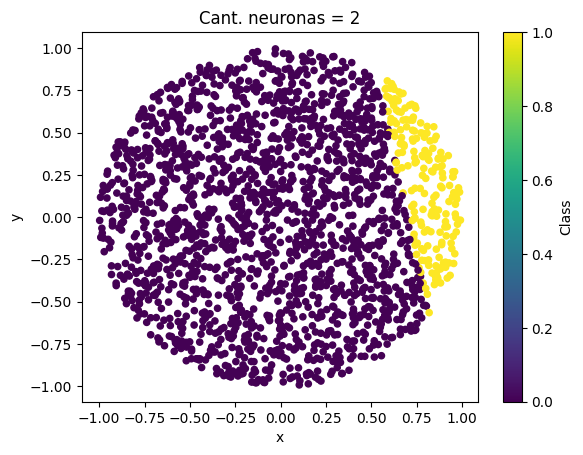

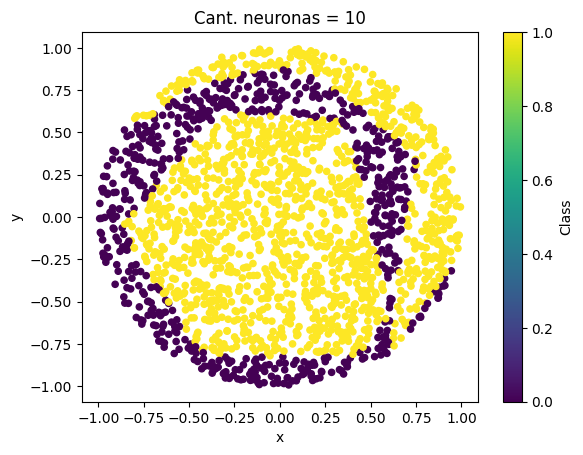

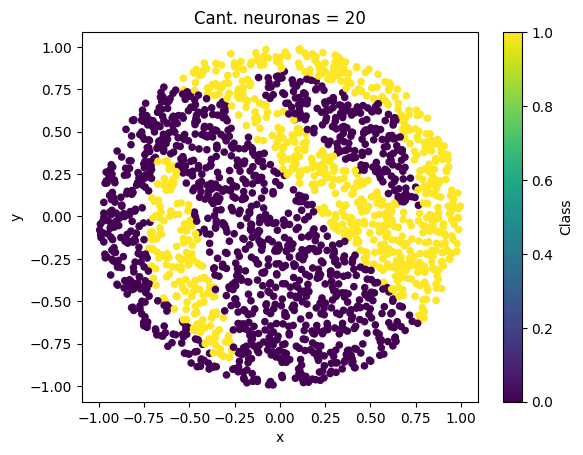

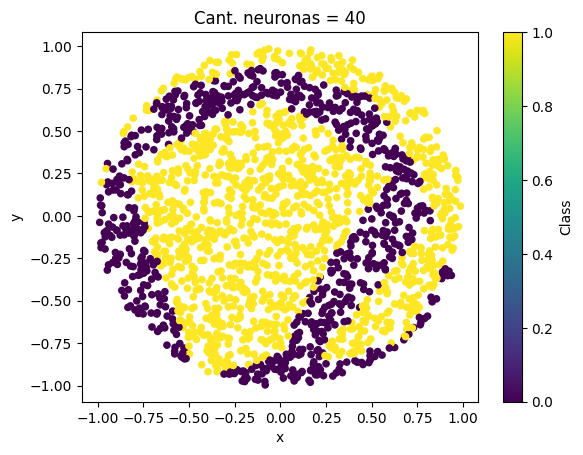

In [ ]:
N = [2, 10, 20, 40]
evaluaciones = 1000

for N2 in N:
  clasif, X_train, y_train, X_val, y_val, X_test, y_test = ej1(N2)
  clasif, _, _, _ = entrenar_red(clasif, evaluaciones, X_train, y_train, X_val,
                              y_val, X_test, y_test)

  y = clasif.predict(X_test)
  X_test['Class'] = y
  X_test.plot(x = 0, y = 1, kind = 'scatter', c = 'Class', colormap = 'viridis',
              title = 'Cant. neuronas = ' + str(N2))

Se puede observar en las gráficas que no se llegan a recrear las espirales.

A pesar de entrenar redes con cada vez más cantidad de neuronas en la capa oculta, no se observan mejoras en la clasificación de los puntos, dando mejores resultados los árboles de decisión que las redes neuronales para este problema.

**Ejercicio 2**

In [23]:
import random

def ej2(eta, alfa):
  epocas = 50     # Número de épocas que entrena cada vez
  N2 = 6          # Cantidad de neuronas en la capa intermedia

  train = 500
  dataset = 1000

  skip = sorted(random.sample(range(dataset), dataset - train))
  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                  'Datasets/dos_elipses.data', header = None, skiprows = skip)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.9,
                                                    random_state = 0)

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/dos_elipses.test', header = None)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  clasif = MLPClassifier(hidden_layer_sizes = (N2,), activation = 'logistic',
                         solver = 'sgd', alpha = 0.0, batch_size = 1,
                         learning_rate = 'constant', learning_rate_init = eta,
                         momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                         warm_start = True, max_iter = epocas)

  return clasif, X_train, y_train, X_val, y_val, X_test, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

╒═════════════════════════╤═══════════════╤════════════════════╤══════════════╕
│                         │   Train Error │   Validation Error │   Test Error │
╞═════════════════════════╪═══════════════╪════════════════════╪══════════════╡
│ eta = 0.1, alfa = 0     │      0.155174 │           0.19832  │     0.157889 │
├─────────────────────────┼───────────────┼────────────────────┼──────────────┤
│ eta = 0.1, alfa = 0.5   │      0.120081 │           0.12544  │     0.12344  │
├─────────────────────────┼───────────────┼────────────────────┼──────────────┤
│ eta = 0.1, alfa = 0.9   │      0.134538 │           0.150627 │     0.134938 │
├─────────────────────────┼───────────────┼────────────────────┼──────────────┤
│ eta = 0.01, alfa = 0    │      0.253333 │           0.24     │     0.2435   │
├─────────────────────────┼───────────────┼────────────────────┼──────────────┤
│ eta = 0.01, alfa = 0.5  │      0.239347 │           0.241393 │     0.226787 │
├─────────────────────────┼─────────────

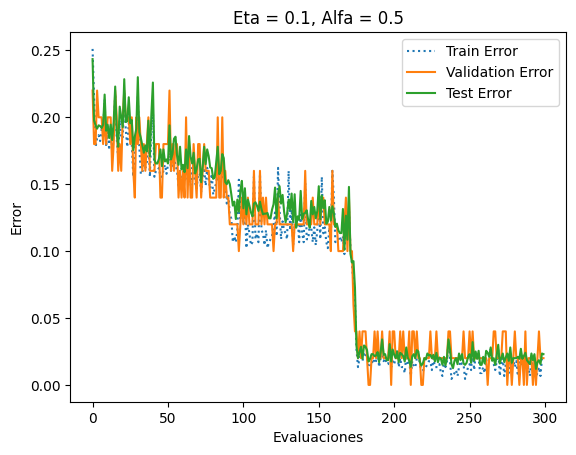

In [24]:
import numpy as np
from tabulate import tabulate

etas = [0.1, 0.01, 0.001]
alfas = [0, 0.5, 0.9]
evaluaciones = 300

mean_errors_train = []
mean_errors_val = []
mean_errors_test = []

best_eta = None
best_alfa = None
best_error = None
best_mean_train = None
best_mean_val = None
best_mean_test = None

for eta in etas:
  for alfa in alfas:
    errors_train = []
    errors_val = []
    errors_test = []

    best_error_local = None
    best_train_local = None
    best_val_local = None
    best_test_local = None

    for i in range(10):
      clasif, X_train, y_train, X_val, y_val, X_test, y_test = ej2(eta, alfa)
      _, e_train, e_val, e_test = entrenar_red(clasif, evaluaciones, X_train,
                                               y_train, X_val, y_val, X_test,
                                               y_test)
      errors_train += [e_train]
      errors_val += [e_val]
      errors_test += [e_test]

      min_error_test = min(e_test)

      if best_error_local == None or min_error_test < best_error_local:
        best_error_local = min_error_test
        best_train_local = e_train
        best_val_local = e_val
        best_test_local = e_test

    mean_error_test = np.mean(errors_test)

    mean_errors_train += [np.mean(errors_train)]
    mean_errors_val += [np.mean(errors_val)]
    mean_errors_test += [mean_error_test]

    if best_error == None or mean_error_test < best_error:
      best_eta = eta
      best_alfa = alfa
      best_error = mean_error_test
      best_mean_train = best_train_local
      best_mean_val = best_val_local
      best_mean_test = best_test_local

colNames = ['Train Error', 'Validation Error', 'Test Error']
rowNames = ['eta = ' + str(eta) + ', alfa = ' + str(alfa) for eta in etas for
            alfa in alfas]

table = list(zip(mean_errors_train, mean_errors_val, mean_errors_test))

print(tabulate(table, headers = colNames , showindex = rowNames,
               tablefmt = 'fancy_grid'))

plt.plot(range(evaluaciones), best_mean_train, label = 'train', linestyle = ':')
plt.plot(range(evaluaciones), best_mean_val, label = 'test', linestyle = '-')
plt.plot(range(evaluaciones), best_mean_test, label = 'test', linestyle = '-')
plt.title('Eta = ' + str(best_eta) + ', Alfa = ' + str(best_alfa))
plt.xlabel('Evaluaciones')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])
plt.show()

Luego de entrenar las redes para los distintos valores de eta y alfa, se obtiene que la mejor combinación es eta = 0.1, alfa = 0.5.

Como se observa en la tabla, se obtienen mínimos para esta combinación para los tres errores medidos. A su vez, para el mismo learning rate pero con un moméntum de 0.9 se obtienen errores bastante cercanos.

Además, se observa en la tabla que a medida que disminuye el orden de magnitud de eta se obtienen peores errores, independientemente del alfa elegido.

Con respecto a la gráfica, se pueden observar saltos alrededor de las 100 evaluaciones, y nuevamente cerca de las 175 evaluaciones. Esto puede deberse a que en esos puntos se logró superar mínimos locales, lo cual resultó en los buenos resultados obtenidos para esta combinación de learning rate y moméntum.

**Ejercicio 3**

In [ ]:
import random

def ej3(proporcion):
  eta = 0.01      # Learning rate
  alfa = 0.9      # Momentum
  epocas = 50     # Número de épocas que entrena cada vez
  N2 = 30         # Cantidad de neuronas en la capa intermedia

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ikeda.data', header = None,
                   delim_whitespace = True)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    train_size = proporcion,
                                                    random_state = 0)

  test = 2000
  dataset = 4800

  skip = sorted(random.sample(range(dataset), dataset - test))
  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ikeda.test', header = None, skiprows = skip,
                   delim_whitespace = True)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  regr = MLPRegressor(hidden_layer_sizes = (N2,), activation = 'logistic',
                      solver = 'sgd', alpha = 0.0, batch_size = 1,
                      learning_rate = 'constant', learning_rate_init = eta,
                      momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                      warm_start = True, max_iter = epocas)

  return regr, X_train, y_train, X_val, y_val, X_test, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


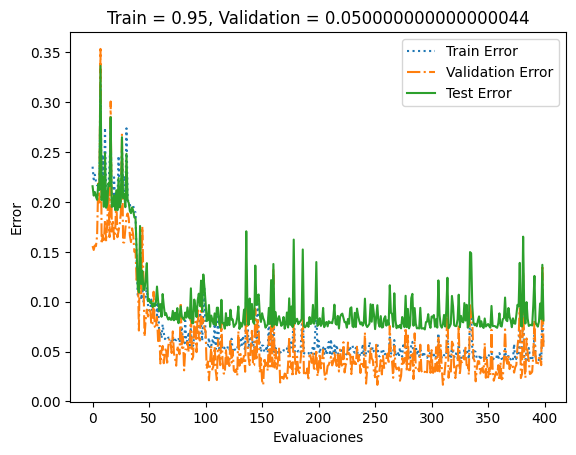

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


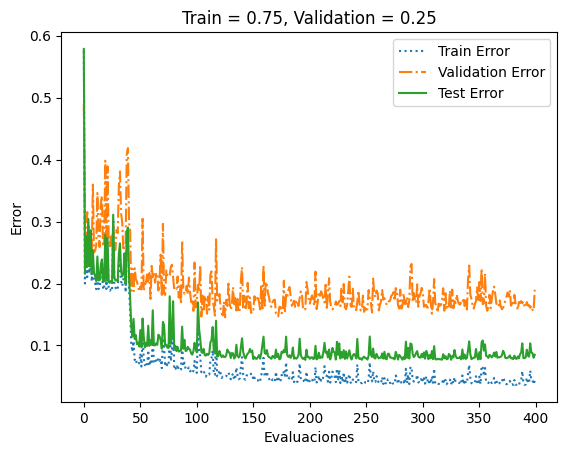

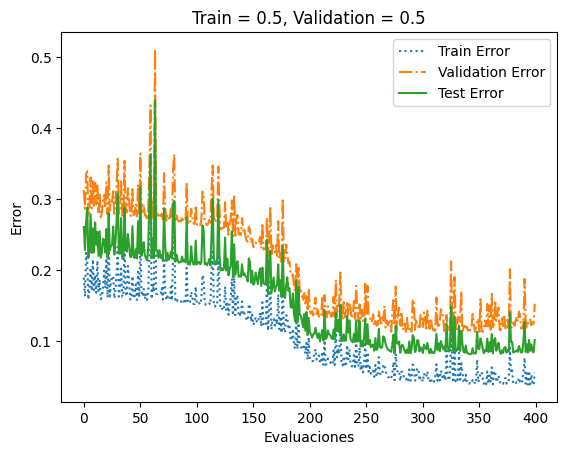

In [ ]:
P = [0.95, 0.75, 0.5]
evaluaciones = 400

for proporcion in P:
  regr, X_train, y_train, X_val, y_val, X_test, y_test = ej3(proporcion)
  _, e_train, e_val, e_test = entrenar_red(regr, evaluaciones, X_train, y_train,
                                           X_val, y_val, X_test, y_test)

  plt.plot(range(evaluaciones), e_train, label = 'train', linestyle = ':')
  plt.plot(range(evaluaciones), e_val, label = 'validacion',linestyle = '-.')
  plt.plot(range(evaluaciones), e_test, label = 'test', linestyle = '-')
  plt.title('Train = ' + str(proporcion) + ', Validation = ' +
            str(1 - proporcion))
  plt.xlabel('Evaluaciones')
  plt.ylabel('Error')
  plt.legend(['Train Error', 'Validation Error', 'Test Error'])
  plt.show()

Aunque en la proporción 95%-5% se puede observar que el error de entrenamiento y el de validación son bastante cercanos, en las otras dos proporciones el error de validación es mayor que el error de entrenamiento y el de test.

Por otro lado, se observa que los tres errores disminuyen abruptamente en la primera figura alrededor de las 40 evaluaciones, y luego se "estabilizan" alrededor del mínimo error obtenido al entrenar las redes. En cambio, en las otras dos figuras esta disminución se da más suavemente, y se necesitaron más evaluaciones para acercarse al mínimo.

De las tres figuras, se observa que en la primera el error de test es menor, por lo que considero que es conveniente tener más datos para entrenar; es decir, considero mejor la proporción 95%-5%.

**Ejercicio 4**

In [ ]:
import numpy as np
import sklearn as sk

def entrenar_red_ej4(red, evaluaciones, X_train, y_train, X_test, y_test):
  error_train = []
  error_test = []
  lista_pesos = []

  for i in range(evaluaciones):
    red.fit(X_train, y_train)
    y_train_pred = red.predict(X_train)
    y_test_pred = red.predict(X_test)

    e_train = sk.metrics.mean_squared_error(y_train, y_train_pred)
    e_test = sk.metrics.mean_squared_error(y_test, y_test_pred)

    error_train += [e_train]
    error_test += [e_test]

    pesos = red.coefs_
    suma_pesos = sum(map(lambda p : np.sum(np.abs(p)), pesos))
    lista_pesos += [suma_pesos]

  min_error = min(error_test)

  return min_error, error_train, error_test, lista_pesos

In [ ]:
def ej4(gamma):
  eta = 0.05      # Learning rate
  alfa = 0.3      # Momentum
  epocas = 20     # Número de épocas que entrena cada vez
  N2 = 6          # Cantidad de neuronas en la capa intermedia

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ssp.data', header = None)
  X_train = df[df.columns[:-1]]
  y_train = df[df.columns[-1]]

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ssp.test', header = None)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  regr = MLPRegressor(hidden_layer_sizes = (N2,), activation = 'logistic',
                      solver = 'sgd', alpha = gamma, batch_size = 1,
                      learning_rate = 'constant', learning_rate_init = eta,
                      momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                      warm_start = True, max_iter = epocas)

  return regr, X_train, y_train, X_test, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


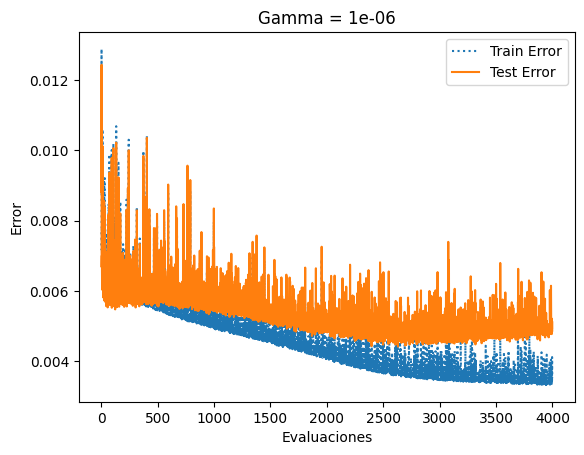

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


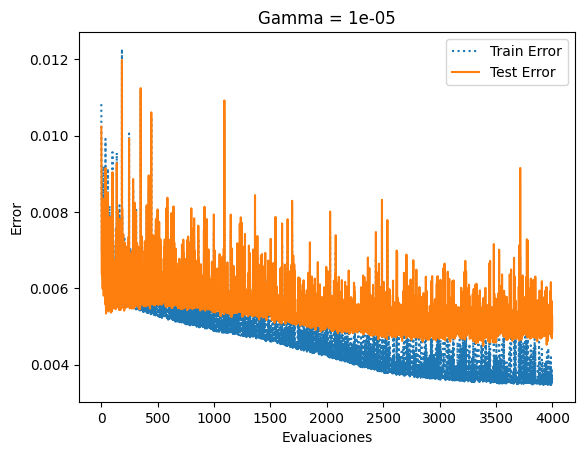

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


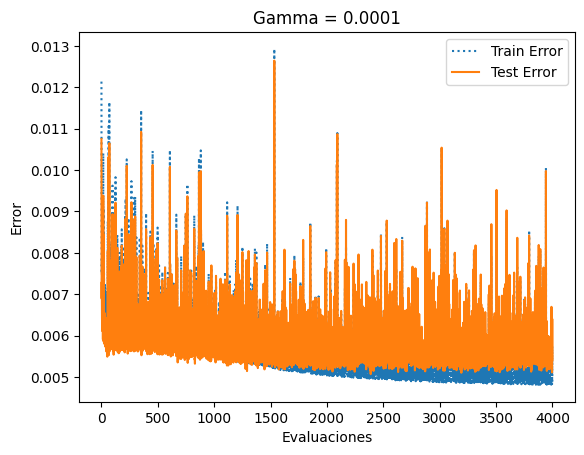

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


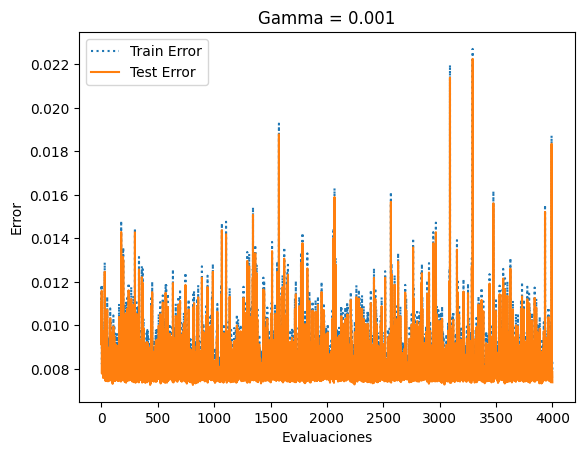

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


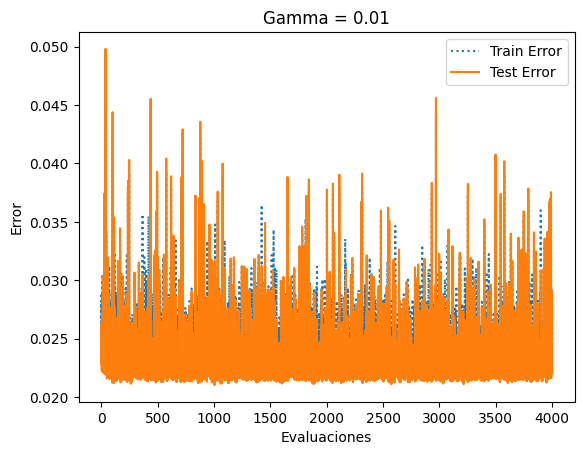

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


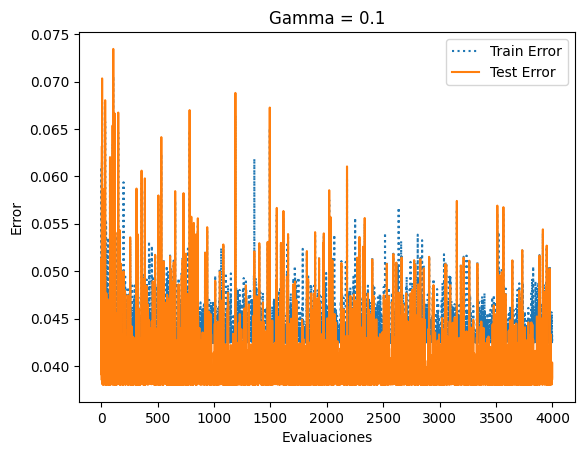

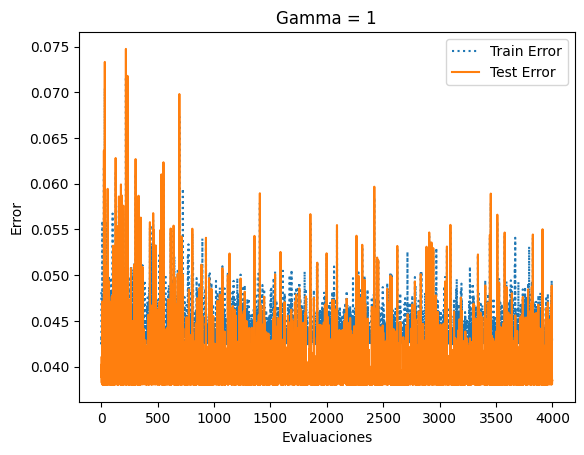

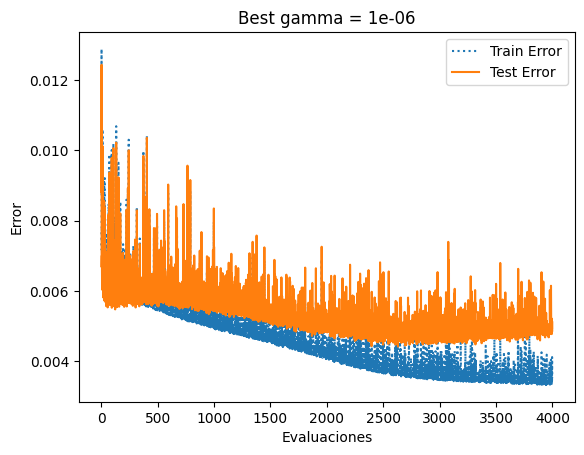

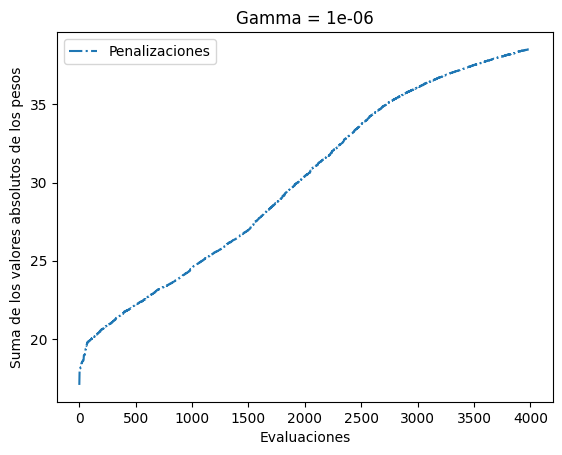

In [ ]:
gammas = [10**e for e in range(-6, 1)]
evaluaciones = 4000

best_gamma = None
best_error = None
best_e_train = None
best_e_test = None
best_pesos = None

for gamma in gammas:
  regr, X_train, y_train, X_test, y_test = ej4(gamma)
  min_error, e_train, e_test, pesos = entrenar_red_ej4(regr, evaluaciones,
                                                       X_train, y_train, X_test,
                                                       y_test)
  if best_error == None or min_error < best_error:
    best_gamma = gamma
    best_error = min_error
    best_e_train = e_train
    best_e_test = e_test
    best_pesos = pesos

  plt.plot(range(evaluaciones), e_train, label = 'train', linestyle = ':')
  plt.plot(range(evaluaciones), e_test, label = 'test', linestyle = '-')
  plt.title('Gamma = ' + str(gamma))
  plt.xlabel('Evaluaciones')
  plt.ylabel('Error')
  plt.legend(['Train Error', 'Test Error'])
  plt.show()

plt.plot(range(evaluaciones), best_e_train, label = 'train', linestyle = ':')
plt.plot(range(evaluaciones), best_e_test, label = 'test', linestyle = '-')
plt.title('Best gamma = ' + str(best_gamma))
plt.xlabel('Evaluaciones')
plt.ylabel('Error')
plt.legend(['Train Error', 'Test Error'])
plt.show()

plt.plot(range(evaluaciones), best_pesos, label = 'pesos', linestyle = '-.')
plt.title('Gamma = ' + str(best_gamma))
plt.xlabel('Evaluaciones')
plt.ylabel('Suma de los valores absolutos de los pesos')
plt.legend(['Penalizaciones'])
plt.show()

El mejor gamma obtenido es de 10^(-6). Otro valor en el que se obtuvieron valores de error similares es gamma = 10^(-5).

Como se puede observar en las gráficas, a mayor orden de magnitud de gamma se obtuvieron mayores errores, tanto de entrenamiento como de test. Por lo tanto, resulta conveniente elegir un gamma chico.

A partir de las gráficas se podría decir que en ningún caso hay sobreajuste.

**Ejercicio 5**

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt, ceil, pi
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from statistics import mean

# Usada por los ítems a) y b). Genera un dataframe a partir de los parámetros
# recibidos
def generate_dataframe(d, n, C, center0, center1, diag):
  # Cantidad de puntos d-dimensionales a generar para la clase 0
  size0 = ceil(n / 2)
  # Cantidad de puntos d-dimensionales a generar para la clase 1
  size1 = n // 2

  # Genero los puntos de la clase 0
  class0 = np.random.multivariate_normal(center0, diag, size0)
  # Y luego los de la clase 1
  class1 = np.random.multivariate_normal(center1, diag, size1)

  # Concateno los puntos generados en un solo array
  data = np.concatenate((class0, class1))
  # Genero las columnas que van a representar las coordenadas de cada punto
  col = list(range(d))

  # Genero el dataframe
  df = pd.DataFrame(data, columns = col)

  # Genero la columna correspondiente a la clase a la que pertenece cada punto
  classes = [0] * size0 + [1] * size1
  # Y la agrego al dataframe
  df['Class'] = classes

  return df

# Ítem a)
def diagonal(d, n, C):
  # Genero los centros para ambas clases
  center0 = [-1] * d
  center1 = [1] * d
  # Y la matriz de covarianza diagonal
  diag = np.diag([(C * sqrt(d)) ** 2] * d)

  # Genero y devuelvo el dataframe
  return generate_dataframe(d, n, C, center0, center1, diag)

# Ítem b)
def parallel(d, n, C):
  # Genero los centros para ambas clases
  center0 = [-1] + [0] * (d - 1)
  center1 = [1] + [0] * (d - 1)
  # Y la matriz de covarianza diagonal
  diag = np.diag([C ** 2] * d)

  # Genero y devuelvo el dataframe
  return generate_dataframe(d, n, C, center0, center1, diag)

In [ ]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier

# Genera 20 dataframes "diagonal" y 20 dataframes "paralelo" a partir de los
# parámetros recibidos
def generate_train(d,n,C):
  diags = []
  parals = []

  for i in range(20):
    diag = diagonal(d,n,C)
    paral = parallel(d,n,C)
    diags += [diag]
    parals += [paral]

  return diags, parals

# Genera un dataframe para usar como conjunto de test
def generate_test(d,C):
  n = 10000
  diag = diagonal(d,n,C)
  paral = parallel(d,n,C)

  return diag, paral

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, entrena
# árboles y calcula los promedios de los errores de train y de test
def errorsTrees(dfs, df_test):
  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]
  
  trainErrorRates = []
  testErrorRates = []

  for df in dfs:
    X_train = df[df.columns[:-1]]
    y_train = df[df.columns[-1]]
    clf = DecisionTreeClassifier(criterion = 'entropy',
                                 min_impurity_decrease = 0.005,
                                 random_state = 0, min_samples_leaf = 5)
    clf.fit(X_train, y_train)
    trainErrorRates += [1 - accuracy_score(y_train, clf.predict(X_train))]
    testErrorRates += [1 - accuracy_score(y_test, clf.predict(X_test))]

  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)
  return trainErrorMean, testErrorMean

# Dada una lista de conjuntos de entrenamiento y un conjunto de test, entrena
# redes y calcula los promedios de los errores de train y de test
def errorsRedes(dfs, df_test):
  eta = 0.1       # Learning rate
  alfa = 0.5      # Momentum
  epocas = 20     # Número de épocas que entrena cada vez
  N2 = 6          # Cantidad de neuronas en la capa intermedia

  evaluaciones = 200

  X_test = df_test[df_test.columns[:-1]]
  y_test = df_test[df_test.columns[-1]]

  trainErrorRates = []
  testErrorRates = []

  for df in dfs:
    X_train = df[df.columns[:-1]]
    y_train = df[df.columns[-1]]

    clasif = MLPClassifier(hidden_layer_sizes = (N2,), activation = 'logistic',
                           solver = 'sgd', alpha = 0.0, batch_size = 1,
                           learning_rate = 'constant', learning_rate_init = eta,
                           momentum = alfa, nesterovs_momentum = False,
                           tol = 0.0, warm_start = True, max_iter = epocas)

    for i in range(evaluaciones):
      clasif.fit(X_train, y_train)
      y_train_pred = clasif.predict(X_train)
      y_test_pred = clasif.predict(X_test)

      e_train = sk.metrics.zero_one_loss(y_train, y_train_pred)
      e_test = sk.metrics.zero_one_loss(y_test, y_test_pred)
    
      trainErrorRates += [e_train]
      testErrorRates += [e_test]

  trainErrorMean = mean(trainErrorRates)
  testErrorMean = mean(testErrorRates)

  return trainErrorMean, testErrorMean

In [ ]:
# Ejercicio 4 (TP1)

C = 0.78
n = 250

#Genero los conjuntos de entrenamiento

# d = 2
df1_Diag, df1_Paral = generate_train(2,n,C)
test1_Diag, test1_Paral = generate_test(2,C)

# d = 4
df2_Diag, df2_Paral = generate_train(4,n,C)
test2_Diag, test2_Paral = generate_test(4,C)

# d = 8
df3_Diag, df3_Paral = generate_train(8,n,C)
test3_Diag, test3_Paral = generate_test(8,C)

# d = 16
df4_Diag, df4_Paral = generate_train(16,n,C)
test4_Diag, test4_Paral = generate_test(16,C)

# d = 32
df5_Diag, df5_Paral = generate_train(32,n,C)
test5_Diag, test5_Paral = generate_test(32,C)

In [ ]:
# Calculo los errores de las redes

# Diagonal

# d = 2
e_train1_Diag_Redes, e_test1_Diag_Redes = errorsRedes(df1_Diag, test1_Diag)

In [ ]:
# d = 4
e_train2_Diag_Redes, e_test2_Diag_Redes = errorsRedes(df2_Diag, test2_Diag)

In [ ]:
# d = 8
e_train3_Diag_Redes, e_test3_Diag_Redes = errorsRedes(df3_Diag, test3_Diag)

In [ ]:
# d = 16
e_train4_Diag_Redes, e_test4_Diag_Redes = errorsRedes(df4_Diag, test4_Diag)

In [ ]:
# d = 32
e_train5_Diag_Redes, e_test5_Diag_Redes = errorsRedes(df5_Diag, test5_Diag)

In [ ]:
# Y los agrupo en listas
e_train_Diag_Redes = [e_train1_Diag_Redes, e_train2_Diag_Redes,
                      e_train3_Diag_Redes, e_train4_Diag_Redes,
                      e_train5_Diag_Redes]
e_test_Diag_Redes = [e_test1_Diag_Redes, e_test2_Diag_Redes, e_test3_Diag_Redes,
                     e_test4_Diag_Redes, e_test5_Diag_Redes]

In [ ]:
# Paralelo

# d = 2
e_train1_Paral_Redes, e_test1_Paral_Redes = errorsRedes(df1_Paral, test1_Paral)

In [ ]:
# d = 4
e_train2_Paral_Redes, e_test2_Paral_Redes = errorsRedes(df2_Paral, test2_Paral)

In [ ]:
# d = 8
e_train3_Paral_Redes, e_test3_Paral_Redes = errorsRedes(df3_Paral, test3_Paral)

In [ ]:
# d = 16
e_train4_Paral_Redes, e_test4_Paral_Redes = errorsRedes(df4_Paral, test4_Paral)

In [ ]:
# d = 32
e_train5_Paral_Redes, e_test5_Paral_Redes = errorsRedes(df5_Paral, test5_Paral)

In [ ]:
# Y los agrupo en listas
e_train_Paral_Redes = [e_train1_Paral_Redes, e_train2_Paral_Redes,
                      e_train3_Paral_Redes, e_train4_Paral_Redes,
                      e_train5_Paral_Redes]
e_test_Paral_Redes = [e_test1_Paral_Redes, e_test2_Paral_Redes,
                      e_test3_Paral_Redes, e_test4_Paral_Redes,
                      e_test5_Paral_Redes]

In [ ]:
# Calculo los errores de los árboles

# Diagonal

# d = 2
e_train1_Diag_Trees, e_test1_Diag_Trees = errorsTrees(df1_Diag, test1_Diag)
# d = 4
e_train2_Diag_Trees, e_test2_Diag_Trees = errorsTrees(df2_Diag, test2_Diag)
# d = 8
e_train3_Diag_Trees, e_test3_Diag_Trees = errorsTrees(df3_Diag, test3_Diag)
# d = 16
e_train4_Diag_Trees, e_test4_Diag_Trees = errorsTrees(df4_Diag, test4_Diag)
# d = 32
e_train5_Diag_Trees, e_test5_Diag_Trees = errorsTrees(df5_Diag, test5_Diag)

# Y los agrupo en listas
e_train_Diag_Trees = [e_train1_Diag_Trees, e_train2_Diag_Trees,
                      e_train3_Diag_Trees, e_train4_Diag_Trees,
                      e_train5_Diag_Trees]
e_test_Diag_Trees = [e_test1_Diag_Trees, e_test2_Diag_Trees, e_test3_Diag_Trees,
                     e_test4_Diag_Trees, e_test5_Diag_Trees]

# Paralelo

# d = 2
e_train1_Paral_Trees, e_test1_Paral_Trees = errorsTrees(df1_Paral, test1_Paral)
# d = 4
e_train2_Paral_Trees, e_test2_Paral_Trees = errorsTrees(df2_Paral, test2_Paral)
# d = 8
e_train3_Paral_Trees, e_test3_Paral_Trees = errorsTrees(df3_Paral, test3_Paral)
# d = 16
e_train4_Paral_Trees, e_test4_Paral_Trees = errorsTrees(df4_Paral, test4_Paral)
# d = 32
e_train5_Paral_Trees, e_test5_Paral_Trees = errorsTrees(df5_Paral, test5_Paral)

# Y los agrupo en listas
e_train_Paral_Trees = [e_train1_Paral_Trees, e_train2_Paral_Trees,
                       e_train3_Paral_Trees, e_train4_Paral_Trees,
                       e_train5_Paral_Trees]
e_test_Paral_Trees = [e_test1_Paral_Trees, e_test2_Paral_Trees,
                      e_test3_Paral_Trees, e_test4_Paral_Trees,
                      e_test5_Paral_Trees]

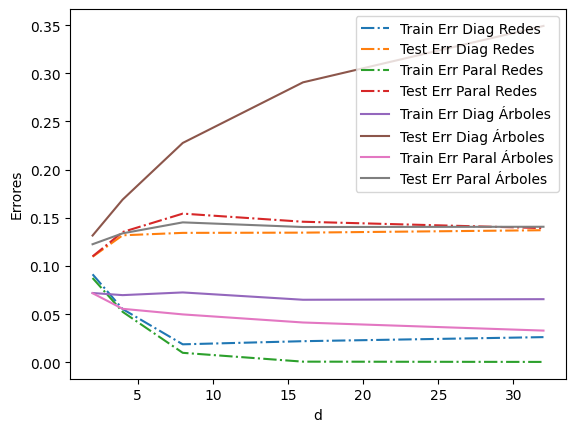

In [ ]:
# Grafico
d = [2, 4, 8, 16, 32]

# Diagonal redes
plt.plot(d, e_train_Diag_Redes, linestyle = '-.')
plt.plot(d, e_test_Diag_Redes, linestyle = '-.')

# Paralelo redes
plt.plot(d, e_train_Paral_Redes, linestyle = '-.')
plt.plot(d, e_test_Paral_Redes, linestyle = '-.')

# Diagonal árboles
plt.plot(d, e_train_Diag_Trees)
plt.plot(d, e_test_Diag_Trees)

# Paralelo árboles
plt.plot(d, e_train_Paral_Trees)
plt.plot(d, e_test_Paral_Trees)

# Etiquetas
plt.xlabel('d')
plt.ylabel('Errores')
plt.legend(['Train Err Diag Redes', 'Test Err Diag Redes',
            'Train Err Paral Redes', 'Test Err Paral Redes',
            'Train Err Diag Árboles', 'Test Err Diag Árboles',
            'Train Err Paral Árboles', 'Test Err Paral Árboles'])

Resulta notable que los errores de entrenamiento de las redes, tanto para el problema diagonal como para el paralelo, resultaron ligeramente mayores que los de los árboles de decisión sólo para d = 2. Luego, a medida que aumentan las dimensiones, las redes dieron mejores resultados, llegando a valores cercanos a 0.

Por otro lado, para el test error hay una gran diferencia en ambos problemas. Mientras que para el problema diagonal el error de las redes se mantuvo en valores similares a dimensiones mayores, en el caso de los árboles el error fue aumentando considerablemente. Pero, para el problema paralelo, los errores resultaron ser muy similares para todos los valores de d.

Se puede concluir que para problemas como el paralelo los árboles dan buenos resultados, pero para problemas no lineales, como es el caso del diagonal, se obtienen mejores resultados usando redes neuronales.

**Ejercicio 6**

In [ ]:
# Iris

from sklearn.datasets import load_iris

def ej6_iris():
  eta = 0.01      # Learning rate
  alfa = 0.9      # Momentum
  epocas = 50     # Número de épocas que entrena cada vez
  N2 = 6          # Cantidad de neuronas en la capa intermedia

  X, y = load_iris(return_X_y = True, as_frame = True)
  X, X_test, y, y_test = train_test_split(X, y, test_size = 1/3,
                                          random_state = 0)

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.8,
                                                    random_state = 0)

  clasif = MLPClassifier(hidden_layer_sizes = (N2,), activation = 'logistic',
                         solver = 'sgd', alpha = 0.0, batch_size = 1,
                         learning_rate = 'constant', learning_rate_init = eta,
                         momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                         warm_start = True, max_iter = epocas)
  
  return clasif, X_train, y_train, X_val, y_val, X_test, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


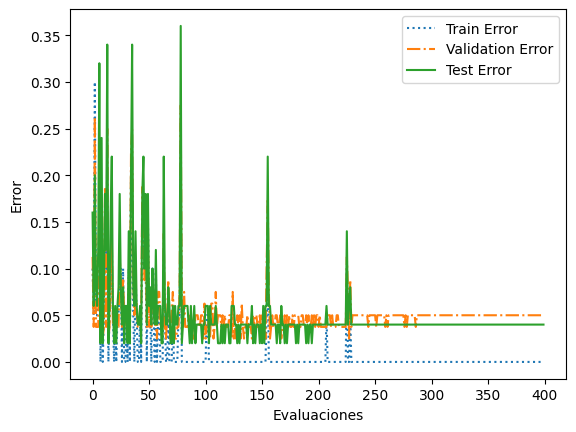

In [ ]:
evaluaciones = 400

clasif, X_train, y_train, X_val, y_val, X_test, y_test = ej6_iris()
_, e_train, e_val, e_test = entrenar_red(clasif, evaluaciones, X_train, y_train,
                                        X_val, y_val, X_test, y_test)

plt.plot(range(evaluaciones), e_train, label = 'train', linestyle = ':')
plt.plot(range(evaluaciones), e_val, label = 'validacion',linestyle = '-.')
plt.plot(range(evaluaciones), e_test, label = 'test', linestyle = '-')
plt.xlabel('Evaluaciones')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])
plt.show()

A partir de la gráfica se puede observar que, para los valores utilizados para entrenar las redes, en las primeras evaluaciones se tienen errores de test bastante altos, pero luego se van estabilizando en un valor relativamente bajo (cercano a 0.05). Para el error de validación ocurre algo similar, aunque luego éste termina siendo mayor al error de test, lo cual me llamó la atención; quizás debería haber usado un conjunto de validación más grande.

Por otro lado, para el error de entrenamiento se tiene que a partir de las 80 evaluaciones (aproximadamente) ya era cercano a 0, con algunos picos que se ven en evaluaciones posteriores.

In [ ]:
# Faces

from sklearn.preprocessing import MinMaxScaler

def ej6_faces():
  eta = 0.01      # Learning rate
  alfa = 0.9      # Momentum
  epocas = 50     # Número de épocas que entrena cada vez
  N2 = 6          # Cantidad de neuronas en la capa intermedia

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/faces.data', header = None)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]

  # Re-escalo los datos al rango [0, 1]
  scaler = MinMaxScaler()
  X = scaler.fit_transform(X)

  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 0)

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/faces.test', header = None)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  # Re-escalo los datos al rango [0, 1]
  scaler = MinMaxScaler()
  X_test = scaler.fit_transform(X_test)

  clasif = MLPClassifier(hidden_layer_sizes = (N2,), activation = 'logistic',
                         solver = 'sgd', alpha = 0.0, batch_size = 1,
                         learning_rate = 'constant', learning_rate_init = eta,
                         momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                         warm_start = True, max_iter = epocas)

  return clasif, X_train, y_train, X_val, y_val, X_test, y_test

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


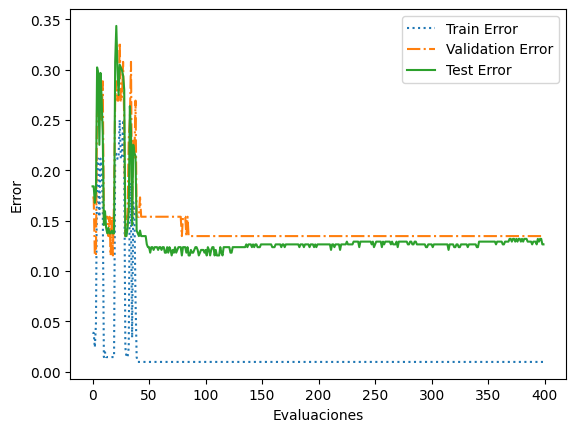

In [ ]:
evaluaciones = 400

clasif, X_train, y_train, X_val, y_val, X_test, y_test = ej6_faces()
_, e_train, e_val, e_test = entrenar_red(clasif, evaluaciones, X_train, y_train,
                                        X_val, y_val, X_test, y_test)

plt.plot(range(evaluaciones), e_train, label = 'train', linestyle = ':')
plt.plot(range(evaluaciones), e_val, label = 'validacion',linestyle = '-.')
plt.plot(range(evaluaciones), e_test, label = 'test', linestyle = '-')
plt.xlabel('Evaluaciones')
plt.ylabel('Error')
plt.legend(['Train Error', 'Validation Error', 'Test Error'])
plt.show()

Vemos que los tres errores fluctúan mucho en las primeras 50 evaluaciones, pero luego se estabilizan bastante, resultando el error de entrenamiento cercano a 0, y los otros errores apenas por debajo de 0.15. A partir de esto concluyo que, a partir de las 50 evaluaciones, la red ajusta los pesos de manera satisfactoria para este problema, con lo que hubiese sido una cantidad suficiente.

**Ejercicio 7**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

def ej7(batch):
  eta = 0.05       # Learning rate
  alfa = 0.3       # Momentum
  epocas = 200     # Número de épocas que entrena cada vez
  N2 = 6           # Cantidad de neuronas en la capa intermedia

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ssp.data', header = None)
  X = df[df.columns[:-1]]
  y = df[df.columns[-1]]
  
  X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8,
                                                    random_state = 0)

  df = pd.read_csv('https://github.com/nachocantore/IAA/raw/master/TP2/'
                   'Datasets/ssp.test', header = None)
  X_test = df[df.columns[:-1]]
  y_test = df[df.columns[-1]]

  regr = MLPRegressor(hidden_layer_sizes = (N2,), activation = 'logistic',
                      solver = 'sgd', alpha = 0.0, batch_size = batch,
                      learning_rate = 'constant', learning_rate_init = eta,
                      momentum = alfa, nesterovs_momentum = False, tol = 0.0,
                      warm_start = True, max_iter = epocas)

  return regr, X_train, y_train, X_val, y_val, X_test, y_test

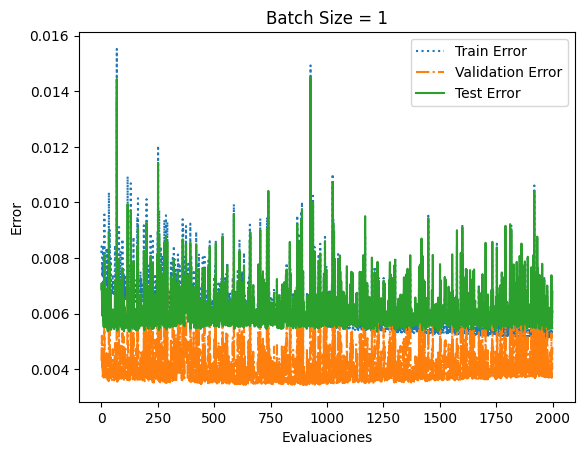

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


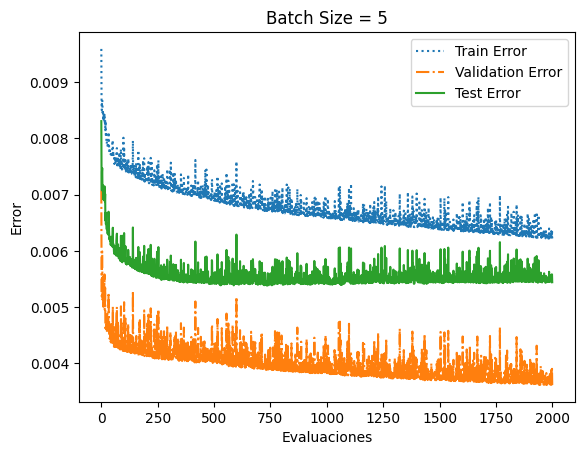

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


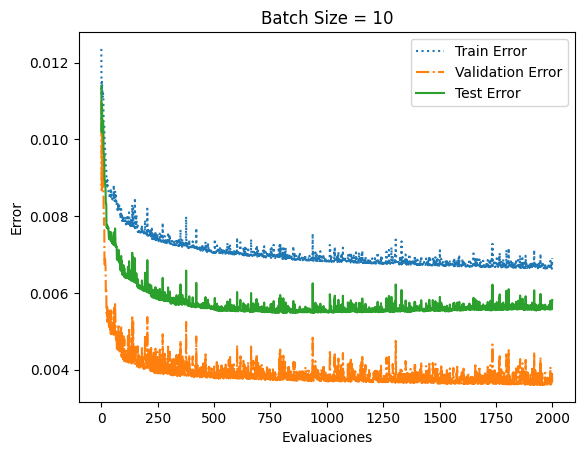

In [ ]:
batch_sizes = [1, 5, 10]
evaluaciones = 2000

for batch in batch_sizes:
  regr, X_train, y_train, X_val, y_val, X_test, y_test = ej7(batch)
  _, e_train, e_val, e_test = entrenar_red(regr, evaluaciones, X_train, y_train,
                                           X_val, y_val, X_test, y_test)

  plt.plot(range(evaluaciones), e_train, label = 'train', linestyle = ':')
  plt.plot(range(evaluaciones), e_val, label = 'validacion',linestyle = '-.')
  plt.plot(range(evaluaciones), e_test, label = 'test', linestyle = '-')
  plt.title('Batch Size = ' + str(batch))
  plt.xlabel('Evaluaciones')
  plt.ylabel('Error')
  plt.legend(['Train Error', 'Validation Error', 'Test Error'])
  plt.show()

Se puede observar que para batch_size = 1 el error máximo fue mayor que en los otros valores de batch_size elegidos.

Además, a medida que se aumenta el batch_size, los errores varían menos al aumentar las evaluaciones.

Algo a destacar es que, a pesar de lo comentado anteriormente, con batch_size = 1 se alcanzaron errores mínimos inferiores a los obtenidos para los otros dos valores de batch_size.